<a href="https://colab.research.google.com/github/antahiap/dsr-nlp/blob/main/notebooks/03_gensim_MAT_lsdyna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Gensim to create word embeddings for LSDYNA MAnual


In [18]:
# Install wget (if not already installed)
!apt-get -qq install wget

# Download a specific file from the GitHub repository
!wget "https://github.com/antahiap/dsr-nlp/raw/main/data/lsdyna_i_r13.txt"
!wget "https://github.com/antahiap/dsr-nlp/raw/main/data/lsdyna_ii_r13.txt"


--2023-08-09 09:39:23--  https://github.com/antahiap/dsr-nlp/raw/main/data/lsdyna_i_r13.txt
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/antahiap/dsr-nlp/main/data/lsdyna_i_r13.txt [following]
--2023-08-09 09:39:23--  https://raw.githubusercontent.com/antahiap/dsr-nlp/main/data/lsdyna_i_r13.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5752722 (5.5M) [application/octet-stream]
Saving to: ‘lsdyna_i_r13.txt.1’

lsdyna_i_r13.txt.1  100%[===================>]   5.49M  --.-KB/s    in 0.02s   

2023-08-09 09:39:24 (319 MB/s) - ‘lsdyna_i_r13.txt.1’ saved [5752722/5752722]

--2023-08-09 09:

In [19]:
!ls

data		   lsdyna_ii_r13.txt.1	lsdyna_i_r13.txt.1
lsdyna_ii_r13.txt  lsdyna_i_r13.txt	sample_data


## Import all necessary modules.

In [20]:
import os
import logging
import os
import multiprocessing
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
import numpy as np
import seaborn as sns
from scipy import spatial
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Train Gensim.

Here we feed all the text data into Gensim to train Word2Vec.

- [Gensim homepage](https://radimrehurek.com/gensim/).
- [Wikipedia: Word2Vec](https://en.wikipedia.org/wiki/Word2vec).

In [21]:
from gensim.test.utils import datapath
from gensim import utils

class MyCorpus:
    """An iterator that yields sentences (lists of str)."""

    def __init__(self):
        self.lines = []

        files = os.listdir(".")
        files = [file for file in files if file.endswith(".txt")]
        print(f"Found {len(files)} files")

        for file in files:
            print(file)
            for line in open(file):
                self.lines += [line]
        print(f"Got {len(self.lines)} lines.")

    def __iter__(self):
        for line in self.lines:
            preprocessed_line = utils.simple_preprocess(line)
            yield preprocessed_line

In [22]:
import gensim.models

sentences = MyCorpus()

model = gensim.models.Word2Vec(
    sentences=sentences,
    sg=1,
    vector_size=300,
    window=20,
    min_count=3,
    workers=multiprocessing.cpu_count()
)

print("Done.")

Found 2 files
lsdyna_ii_r13.txt
lsdyna_i_r13.txt
Got 167968 lines.
Done.


## Find most similar words.

With vectors it is easy to find the nearest neighbours.

Note: Feel free to experiment with your own words.

In [23]:
# Access the vocabulary
vocabulary = model.wv.key_to_index

# Print the vocabulary
count = 0
for word in vocabulary:
    print(word)
    count += 1
    if count > 10: break


the
of
is
for
and
to
in
card
this
be
st


In [24]:
model.wv.most_similar("element", topn=20)

[('ele', 0.6387916207313538),
 ('elements', 0.5910962820053101),
 ('ment', 0.5878101587295532),
 ('elemen', 0.5875946879386902),
 ('lement', 0.5801440477371216),
 ('elem', 0.5555161833763123),
 ('tetrahedron', 0.5554345846176147),
 ('pentahedron', 0.5536704659461975),
 ('twenty', 0.5405003428459167),
 ('tetrahedral', 0.5395461916923523),
 ('section_sol', 0.5390116572380066),
 ('olid', 0.5355142951011658),
 ('elforms', 0.5338120460510254),
 ('fip', 0.5311615467071533),
 ('disc', 0.5305938720703125),
 ('cluster', 0.5301955342292786),
 ('isogeometric', 0.5301833748817444),
 ('fomulations', 0.5301570892333984),
 ('dkt', 0.5298622250556946),
 ('element_', 0.529816746711731)]

## Plot word similarities.

That was just one word. Let us generate a similarity matrix of a lot of words. Again, use your own.

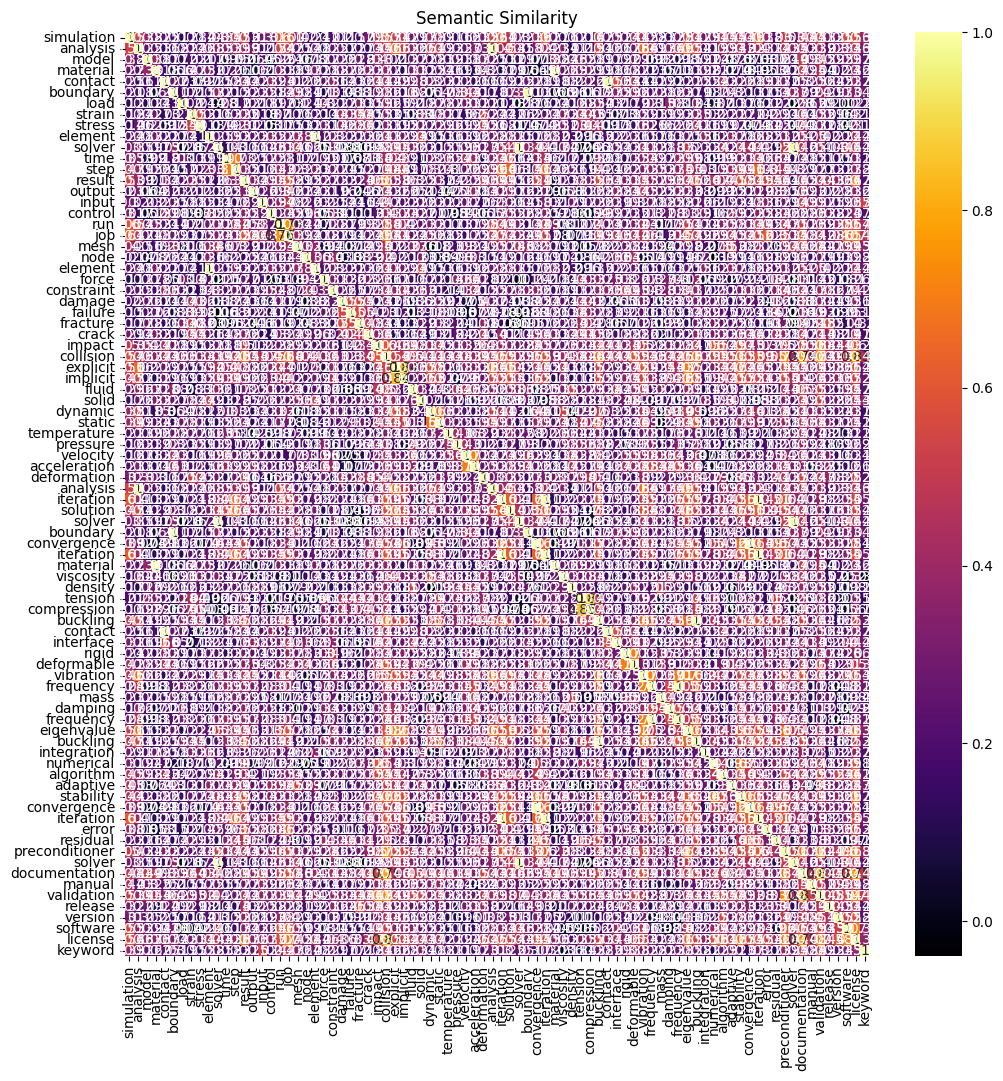

In [31]:
def plot_similarities(words):
    features = [np.array(model.wv[word]) for word in words]

    similarities = np.zeros((len(features), len(features)))
    for index1, feature1 in enumerate(features):
        for index2, feature2 in enumerate(features):
            similarities[index1, index2] = 1 - spatial.distance.cosine(feature1, feature2)

    fig, ax = plt.subplots(figsize=(12, 12))
    g = sns.heatmap(
        similarities,
        annot=True,
        xticklabels=words,
        yticklabels=words,
        cmap="inferno"
    )
    g.set_xticklabels(words, rotation=90)
    g.set_yticklabels(words, rotation=0)
    g.set_title("Semantic Similarity")

words = [
    "simulation", "analysis", "model", "material", "contact",
    "boundary", "load", "strain", "stress", "element",
    "solver", "time", "step", "result", "output",
    "input", "control", "run", "job", "mesh",
    "node", "element", "force", "constraint", "damage",
    "failure", "fracture", "crack", "impact",
    "collision", "explicit", "implicit", "fluid", "solid",
    "dynamic", "static", "temperature", "pressure", "velocity",
    "acceleration", "deformation", "analysis", "iteration", "solution",
    "solver", "boundary", "convergence", "iteration",
    "material", "viscosity", "density", "tension", "compression",
    "buckling", "contact", "interface", "rigid", "deformable",
    "vibration", "frequency", "mass", "damping", "frequency",
    "eigenvalue", "buckling", "integration", "numerical",
    "algorithm", "adaptive", "stability", "convergence", "iteration",
    "error", "residual", "preconditioner", "solver",
    "documentation", "manual", "validation",
    "release", "version", "software", "license", "keyword"
]



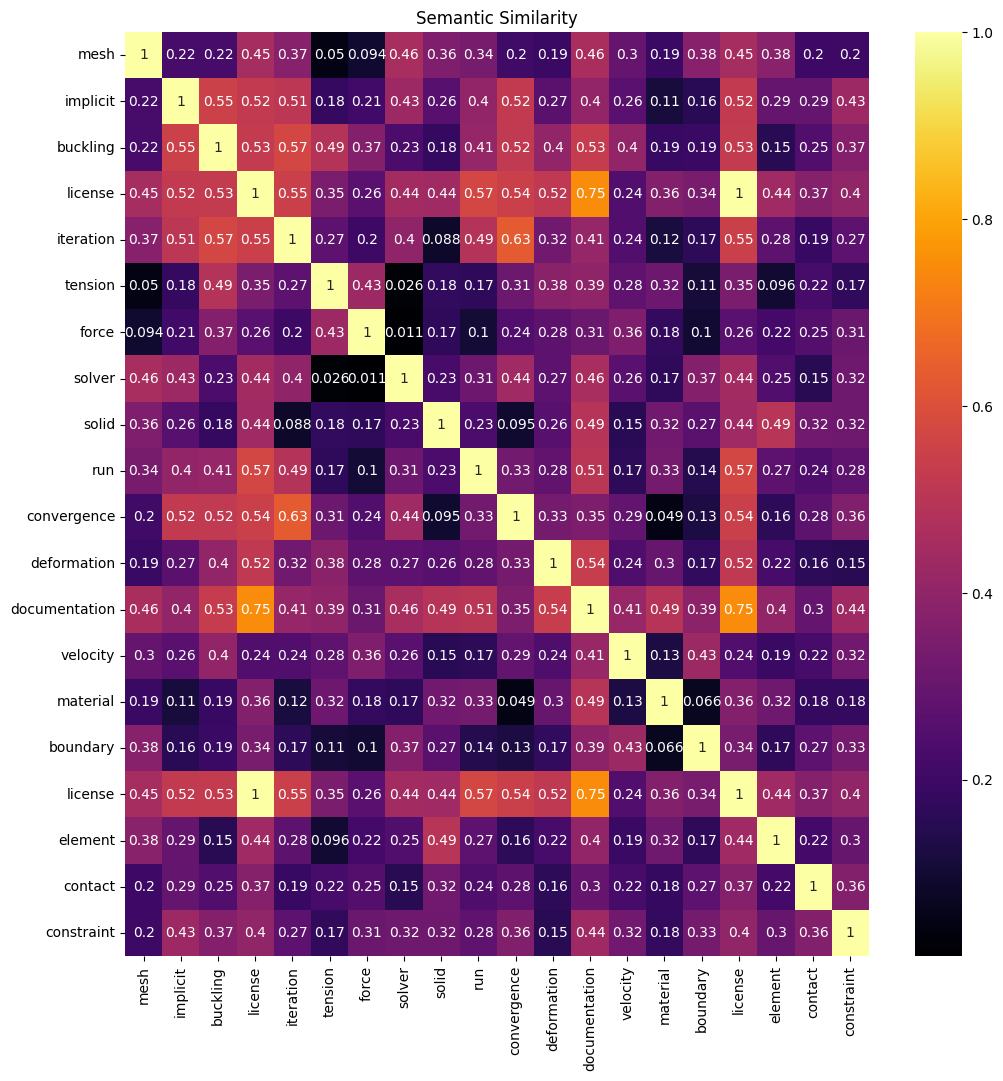

In [32]:

import random
# Select 20 items randomly with replacement
random_items = random.choices(words, k=20)

plot_similarities(random_items)

In [33]:

!wget "https://github.com/antahiap/dsr-nlp/raw/main/data/word_list.py"

--2023-08-09 10:03:53--  https://github.com/antahiap/dsr-nlp/raw/main/data/word_list.py
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/antahiap/dsr-nlp/main/data/word_list.py [following]
--2023-08-09 10:03:53--  https://raw.githubusercontent.com/antahiap/dsr-nlp/main/data/word_list.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120500 (118K) [text/plain]
Saving to: ‘word_list.py’

word_list.py        100%[===================>] 117.68K  --.-KB/s    in 0.001s  

2023-08-09 10:03:53 (77.7 MB/s) - ‘word_list.py’ saved [120500/120500]



In [37]:
from word_list import word_list_MAT

plot_similarities(word_list_MAT[:10])

KeyError: ignored

# Thank you!